In [1]:
from onısleme import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM,\
    BatchNormalization, Activation, MaxPooling2D
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
wandb.init()
config = wandb.config

config.max_len = 11
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

#labels=["Abaküs","Ağaçkakan","Akademisyen","Akaryakıt","Akışkan","Akrobat","Akvaryum","Albatros","Ameliyat","Asayiş","Bağışıklık","Basmakalıp","Bilimkurgu","Bölgesel","Bukalemun","Çağrışım","Camgöbeği","Cankurtaran","Cengaver","Çepeçevre","Cereyan","Cihangir","Çimento","Çıngırak","Coğrafya","Çuvaldız","Dağarcık","Dahiliye","Davlumbaz","Değirmen","Deniz","Dışbükey","Dolambaç","Dönence","Dramatik","Ejderha","Elmas","Encümen","Erişim","Esrarengiz","Etkileşim","Ettirgen","Faaliyet","Figüran","Filozof","Fiyasko","Fizyoterapi","Fonksiyon","Fragman","Geleneksel","Gelişigüzel","Gergedan","Geribildirim","Giderayak","Giriş","Gümbürtü","Hapşırık","Harmandalı","Hassasiyet","Hava","Hayalperest","Hayırsever","Hazırcevap","Heykeltıraş","Hokkabaz","Ihlamur","İlkokul","İmtiyaz","İndüksiyon","İnorganik","Iraksak","Isırgan","İskelet","Ispanak","Istakoz","İzafiyet","Jelatin","Jenerasyon","Jeneratör","Jeotermal","Jimnastik","Jüpiter","Kaç","Kadastro","Kahkaha","Kalemtıraş","Kamyonet","Kaplumbağa","Karnabahar","Katarakt","Kaynakça","Kazandibi","Kilitle","Kırlangıç","Komposto","Külbastı","Labirent","Lacivert","Lahmacun","Leblebi","Limonata","Lojistik","Lokomotif","Madalyon","Mancınık","Mandalina","Manyetik","Margarin","Menemen","Merhaba","Mıknatıs","Muhallebi","Mürekkep","Muşamba","Müşterek","Müzisyen","Naftalin","Nakliyat","Nasıl","Nedir","Nevresim","Nikola","Nostalji","Numune","Objektif","Oksijen","Öksürük","Okyanus","Öncelik","Orkestra","Otantik","Oyuncak","Özeleştiri","Özgeçmiş","Özgüven","Palyaço","Panayır","Pansiyon","Paraşüt","Patates","Penguen","Piramit","Porselen","Raptiye","Rastlantı","Rengarenk","Rivayet","Rutubet","Saat","Saklambaç","Salıncak","Salyangoz","Serüven","Serzeniş","Silahşör","Süpürge","Tahammül","Tarih","Tekerleme","Teneffüs","Tepegöz","Tercüman","Tertibat","Tolerans","Tulumba","Tümevarım","Uçurtma","Ulaşım","Üniforma","Üniversite","Üretken","Uskumru","Üstgeçit","Üstünkörü","Uygarlık","Uyurgezer","Vanilya","Vantilatör","Varsayım","Veteriner","Veznedar","Vitamin","Volkanik","Yakamoz","Yanardağ","Yelkovan","Yetenek","Yönetmen","Yumurta","Yüzeysel","Zanaat","Zemheri","Zımpara","Zürafa" ]
label=["angry","fearful","happy","sad","suprised","neutral","disgust","calm"]
#label=["bed","bird","cat","dog","down","eight","five","happy","house","zero"]

W&B Run: https://app.wandb.ai/denizekiz1991/uncategorized/runs/21istd3i
Call `%%wandb` in the cell containing your training loop to display live results.


Saving vectors of label - 'angry': 100%|██████████| 300/300 [00:02<00:00, 122.95it/s]


In [4]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [5]:
# # Feature dimension
channels = 1
config.epochs = 300
config.batch_size = 128

num_classes = 8

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)


3.0


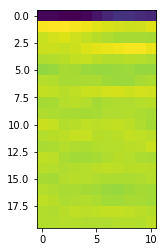

In [20]:
plt.imshow(X_train[1348, :, :, 0])
print(y_train[18])

In [21]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [22]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()

model.add(Flatten(input_shape=(config.buckets, config.max_len)))

model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=label)])

W&B Run: https://app.wandb.ai/denizekiz1991/uncategorized/runs/04j7g78c
Call `%%wandb` in the cell containing your training loop to display live results.


wandb: Wandb version 0.8.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Instructions for updating:
Use tf.cast instead.
Train on 1350 samples, validate on 580 samples
Epoch 1/300
1350/1350 [==============================] - 1s 554us/step - loss: 12.6536 - acc: 0.1652 - val_loss: 12.4253 - val_acc: 0.1603
Epoch 2/300
1350/1350 [==============================] - 0s 33us/step - loss: 11.5487 - acc: 0.1919 - val_loss: 11.6500 - val_acc: 0.2069
Epoch 3/300
1350/1350 [==============================] - 0s 35us/step - loss: 10.7528 - acc: 0.2193 - val_loss: 10.9014 - val_acc: 0.1983
Epoch 4/300
1350/1350 [==============================] - 0s 35us/step - loss: 10.3642 - acc: 0.2378 - val_loss: 11.5105 - val_acc: 0.2138
Epoch 5/300
1350/1350 [==============================] - 0s 37us/step - loss: 11.5833 - acc: 0.2296 - val_loss: 11.5380 - val_acc: 0.2052
Epoch 6/300
1350/1350 [==============================] - 0s 33us/step - loss: 10.3643 - acc: 0.2200 - val_loss: 11.2143 - val_acc: 0.2259
Epoch 7/300
1350/1350 [==============================] - 0s 32us/step - loss

1350/1350 [==============================] - 0s 33us/step - loss: 7.7919 - acc: 0.3311 - val_loss: 10.0476 - val_acc: 0.1810
Epoch 59/300
1350/1350 [==============================] - 0s 32us/step - loss: 8.0037 - acc: 0.3193 - val_loss: 9.4693 - val_acc: 0.1966
Epoch 60/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.9409 - acc: 0.3178 - val_loss: 9.4070 - val_acc: 0.2017
Epoch 61/300
1350/1350 [==============================] - 0s 32us/step - loss: 7.9029 - acc: 0.3119 - val_loss: 9.6308 - val_acc: 0.2103
Epoch 62/300
1350/1350 [==============================] - 0s 32us/step - loss: 9.2519 - acc: 0.2926 - val_loss: 9.2682 - val_acc: 0.2103
Epoch 63/300
1350/1350 [==============================] - 0s 33us/step - loss: 8.0183 - acc: 0.3200 - val_loss: 9.3550 - val_acc: 0.2103
Epoch 64/300
1350/1350 [==============================] - 0s 39us/step - loss: 8.0648 - acc: 0.3156 - val_loss: 9.3496 - val_acc: 0.2000
Epoch 65/300
1350/1350 [=============================

Epoch 118/300
1350/1350 [==============================] - 0s 36us/step - loss: 7.5471 - acc: 0.3511 - val_loss: 9.4093 - val_acc: 0.1897
Epoch 119/300
1350/1350 [==============================] - 0s 38us/step - loss: 7.6675 - acc: 0.3496 - val_loss: 9.2610 - val_acc: 0.2138
Epoch 120/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.6170 - acc: 0.3548 - val_loss: 9.1692 - val_acc: 0.2259
Epoch 121/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.5082 - acc: 0.3689 - val_loss: 9.0251 - val_acc: 0.2190
Epoch 122/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.7018 - acc: 0.3437 - val_loss: 9.4377 - val_acc: 0.1897
Epoch 123/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.6377 - acc: 0.3474 - val_loss: 9.3880 - val_acc: 0.2172
Epoch 124/300
1350/1350 [==============================] - 0s 37us/step - loss: 7.8337 - acc: 0.3370 - val_loss: 9.7083 - val_acc: 0.2190
Epoch 125/300
1350/1350 [=========

1350/1350 [==============================] - 0s 33us/step - loss: 7.4353 - acc: 0.3807 - val_loss: 9.4466 - val_acc: 0.2103
Epoch 178/300
1350/1350 [==============================] - 0s 35us/step - loss: 7.4332 - acc: 0.3859 - val_loss: 9.3695 - val_acc: 0.2034
Epoch 179/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.5340 - acc: 0.3681 - val_loss: 9.3568 - val_acc: 0.2086
Epoch 180/300
1350/1350 [==============================] - 0s 34us/step - loss: 7.5215 - acc: 0.3667 - val_loss: 9.2209 - val_acc: 0.2052
Epoch 181/300
1350/1350 [==============================] - 0s 37us/step - loss: 7.6982 - acc: 0.3548 - val_loss: 9.6244 - val_acc: 0.1897
Epoch 182/300
1350/1350 [==============================] - 0s 42us/step - loss: 7.8571 - acc: 0.3496 - val_loss: 9.3629 - val_acc: 0.2207
Epoch 183/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.5744 - acc: 0.3593 - val_loss: 9.2029 - val_acc: 0.2017
Epoch 184/300
1350/1350 [=======================

1350/1350 [==============================] - 0s 29us/step - loss: 7.7349 - acc: 0.3533 - val_loss: 9.4492 - val_acc: 0.1914
Epoch 237/300
1350/1350 [==============================] - 0s 39us/step - loss: 7.5384 - acc: 0.3763 - val_loss: 9.1197 - val_acc: 0.2259
Epoch 238/300
1350/1350 [==============================] - 0s 37us/step - loss: 7.3580 - acc: 0.3926 - val_loss: 9.6710 - val_acc: 0.1966
Epoch 239/300
1350/1350 [==============================] - 0s 32us/step - loss: 7.8908 - acc: 0.3607 - val_loss: 9.8700 - val_acc: 0.1931
Epoch 240/300
1350/1350 [==============================] - 0s 32us/step - loss: 7.4946 - acc: 0.3704 - val_loss: 9.5947 - val_acc: 0.1914
Epoch 241/300
1350/1350 [==============================] - 0s 31us/step - loss: 7.5083 - acc: 0.3756 - val_loss: 9.4653 - val_acc: 0.2276
Epoch 242/300
1350/1350 [==============================] - 0s 42us/step - loss: 7.4360 - acc: 0.3711 - val_loss: 9.4119 - val_acc: 0.1983
Epoch 243/300
1350/1350 [=======================

1350/1350 [==============================] - 0s 30us/step - loss: 7.4281 - acc: 0.3815 - val_loss: 9.7494 - val_acc: 0.1983
Epoch 296/300
1350/1350 [==============================] - 0s 45us/step - loss: 7.5732 - acc: 0.3674 - val_loss: 9.1788 - val_acc: 0.2328
Epoch 297/300
1350/1350 [==============================] - 0s 36us/step - loss: 7.3569 - acc: 0.3941 - val_loss: 9.4684 - val_acc: 0.1966
Epoch 298/300
1350/1350 [==============================] - 0s 34us/step - loss: 7.4131 - acc: 0.3793 - val_loss: 9.3184 - val_acc: 0.1983
Epoch 299/300
1350/1350 [==============================] - 0s 34us/step - loss: 7.3781 - acc: 0.3822 - val_loss: 9.5570 - val_acc: 0.2000
Epoch 300/300
1350/1350 [==============================] - 0s 42us/step - loss: 7.5356 - acc: 0.3719 - val_loss: 9.3110 - val_acc: 0.2190


In [24]:
# build model
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(LSTM(128, input_shape=(config.buckets, config.max_len), activation="sigmoid"))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))

#model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [26]:
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                           metrics=['accuracy'])

In [27]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=label)])

W&B Run: https://app.wandb.ai/denizekiz1991/uncategorized/runs/x7n9vkga
Call `%%wandb` in the cell containing your training loop to display live results.
Train on 1350 samples, validate on 580 samples
Epoch 1/300
1350/1350 [==============================] - 1s 1ms/step - loss: 0.3801 - acc: 0.8750 - val_loss: 0.3690 - val_acc: 0.8750


wandb: Wandb version 0.8.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 2/300
1350/1350 [==============================] - 1s 456us/step - loss: 0.3715 - acc: 0.8750 - val_loss: 0.3672 - val_acc: 0.8750
Epoch 3/300
1350/1350 [==============================] - 1s 468us/step - loss: 0.3687 - acc: 0.8750 - val_loss: 0.3647 - val_acc: 0.8750
Epoch 4/300
1350/1350 [==============================] - 1s 451us/step - loss: 0.3659 - acc: 0.8750 - val_loss: 0.3656 - val_acc: 0.8750
Epoch 5/300
1350/1350 [==============================] - 1s 454us/step - loss: 0.3656 - acc: 0.8750 - val_loss: 0.3653 - val_acc: 0.8750
Epoch 6/300
1350/1350 [==============================] - 1s 447us/step - loss: 0.3645 - acc: 0.8752 - val_loss: 0.3644 - val_acc: 0.8748
Epoch 7/300
1350/1350 [==============================] - 1s 462us/step - loss: 0.3629 - acc: 0.8749 - val_loss: 0.3625 - val_acc: 0.8748
Epoch 8/300
1350/1350 [==============================] - 1s 456us/step - loss: 0.3608 - acc: 0.8756 - val_loss: 0.3620 - val_acc: 0.8748
Epoch 9/300
1350/1350 [==================

1350/1350 [==============================] - 1s 486us/step - loss: 0.3141 - acc: 0.8893 - val_loss: 0.3558 - val_acc: 0.8722
Epoch 62/300
1350/1350 [==============================] - 1s 474us/step - loss: 0.3113 - acc: 0.8911 - val_loss: 0.3540 - val_acc: 0.8750
Epoch 63/300
1350/1350 [==============================] - 1s 481us/step - loss: 0.3107 - acc: 0.8899 - val_loss: 0.3550 - val_acc: 0.8735
Epoch 64/300
1350/1350 [==============================] - 1s 566us/step - loss: 0.3105 - acc: 0.8913 - val_loss: 0.3564 - val_acc: 0.8724
Epoch 65/300
1350/1350 [==============================] - 1s 571us/step - loss: 0.3112 - acc: 0.8897 - val_loss: 0.3614 - val_acc: 0.8746
Epoch 66/300
1350/1350 [==============================] - 1s 563us/step - loss: 0.3146 - acc: 0.8894 - val_loss: 0.3578 - val_acc: 0.8722
Epoch 67/300
1350/1350 [==============================] - 1s 568us/step - loss: 0.3104 - acc: 0.8906 - val_loss: 0.3599 - val_acc: 0.8716
Epoch 68/300
1350/1350 [=======================

1350/1350 [==============================] - 1s 480us/step - loss: 0.2787 - acc: 0.8985 - val_loss: 0.3856 - val_acc: 0.8679
Epoch 121/300
1350/1350 [==============================] - 1s 532us/step - loss: 0.2816 - acc: 0.8981 - val_loss: 0.3866 - val_acc: 0.8698
Epoch 122/300
1350/1350 [==============================] - 1s 483us/step - loss: 0.2773 - acc: 0.9000 - val_loss: 0.3933 - val_acc: 0.8679
Epoch 123/300
1350/1350 [==============================] - 1s 481us/step - loss: 0.2792 - acc: 0.8995 - val_loss: 0.3876 - val_acc: 0.8685
Epoch 124/300
1350/1350 [==============================] - 1s 486us/step - loss: 0.2865 - acc: 0.8967 - val_loss: 0.3898 - val_acc: 0.8698
Epoch 125/300
1350/1350 [==============================] - 1s 592us/step - loss: 0.2790 - acc: 0.8996 - val_loss: 0.3882 - val_acc: 0.8681
Epoch 126/300
1350/1350 [==============================] - 1s 651us/step - loss: 0.2760 - acc: 0.9018 - val_loss: 0.3905 - val_acc: 0.8694
Epoch 127/300
1350/1350 [================

1350/1350 [==============================] - 1s 469us/step - loss: 0.2532 - acc: 0.9079 - val_loss: 0.4193 - val_acc: 0.8642
Epoch 180/300
1350/1350 [==============================] - 1s 460us/step - loss: 0.2449 - acc: 0.9104 - val_loss: 0.4236 - val_acc: 0.8640
Epoch 181/300
1350/1350 [==============================] - 1s 486us/step - loss: 0.2532 - acc: 0.9081 - val_loss: 0.4203 - val_acc: 0.8664
Epoch 182/300
1350/1350 [==============================] - 1s 477us/step - loss: 0.2538 - acc: 0.9077 - val_loss: 0.4502 - val_acc: 0.8591
Epoch 183/300
1350/1350 [==============================] - 1s 471us/step - loss: 0.2521 - acc: 0.9069 - val_loss: 0.4399 - val_acc: 0.8621
Epoch 184/300
1350/1350 [==============================] - 1s 489us/step - loss: 0.2570 - acc: 0.9057 - val_loss: 0.4379 - val_acc: 0.8636
Epoch 185/300
1350/1350 [==============================] - 1s 481us/step - loss: 0.2511 - acc: 0.9077 - val_loss: 0.4463 - val_acc: 0.8619
Epoch 186/300
1350/1350 [================

1350/1350 [==============================] - 1s 586us/step - loss: 0.2267 - acc: 0.9160 - val_loss: 0.4759 - val_acc: 0.8569
Epoch 239/300
1350/1350 [==============================] - 1s 565us/step - loss: 0.2266 - acc: 0.9166 - val_loss: 0.4751 - val_acc: 0.8591
Epoch 240/300
1350/1350 [==============================] - 1s 557us/step - loss: 0.2276 - acc: 0.9159 - val_loss: 0.4743 - val_acc: 0.8580
Epoch 241/300
1350/1350 [==============================] - 1s 571us/step - loss: 0.2278 - acc: 0.9165 - val_loss: 0.4779 - val_acc: 0.8593
Epoch 242/300
1350/1350 [==============================] - 1s 492us/step - loss: 0.2256 - acc: 0.9161 - val_loss: 0.5091 - val_acc: 0.8560
Epoch 243/300
1350/1350 [==============================] - 1s 469us/step - loss: 0.2295 - acc: 0.9161 - val_loss: 0.5033 - val_acc: 0.8547
Epoch 244/300
1350/1350 [==============================] - 1s 457us/step - loss: 0.2250 - acc: 0.9178 - val_loss: 0.4680 - val_acc: 0.8588
Epoch 245/300
1350/1350 [================

1350/1350 [==============================] - 1s 559us/step - loss: 0.2079 - acc: 0.9240 - val_loss: 0.5545 - val_acc: 0.8478
Epoch 298/300
1350/1350 [==============================] - 1s 564us/step - loss: 0.2325 - acc: 0.9159 - val_loss: 0.4988 - val_acc: 0.8526
Epoch 299/300
1350/1350 [==============================] - 1s 569us/step - loss: 0.2514 - acc: 0.9105 - val_loss: 0.4934 - val_acc: 0.8539
Epoch 300/300
1350/1350 [==============================] - 1s 572us/step - loss: 0.2309 - acc: 0.9157 - val_loss: 0.4949 - val_acc: 0.8545


In [28]:
from keras.models import model_from_json

In [29]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
